In [1]:
import pandas as pd
import numpy as np
import datetime as datetime

In [2]:
df_demo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name ='CustomerDemographic', header = 1)
df_custadd = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerAddress', header = 1)
df_transaction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'Transactions', header = 1)
df_newcustomer = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'NewCustomerList', header = 1)

In [3]:
df_demo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0


In [4]:
df_demo['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64

***we can see there is data incosistency with the initials and full category name of the gender, so we clean it and make it in calculative format

In [5]:
df_demo['gender'].replace(['Female', 'Femal'], 'F', inplace=True)
df_demo['gender'].replace('Male', 'M', inplace=True)

In [6]:
df_demo['gender'].value_counts()

F    2039
M    1873
U      88
Name: gender, dtype: int64

In [7]:
df_demo['default'].value_counts()

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ                     31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64

We'll remove default coulmn as it is irrelevent and has no valuable data 

In [8]:
df_demo = df_demo.drop(['default'], axis = 1)

### To check if all the columns has value or some data missing we'll check each column for that

In [9]:
df_demo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

**Here we can see in the result that in last_name, DOB, job_title, job_industry_category, default and tenure has missing data (showing the number of missing data) <br>
**we'll drop the rows, that has nan or none value or we can say no value in it

In [10]:
df_demo = df_demo.dropna()

In [11]:
df_demo.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

### now we are calcluating the age here and adding a column age in the dataframe, after that we'll categorise age into 4 different groups by defining age_range

In [12]:
from datetime import datetime

df_demo["age"] = df_demo["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


We'll drop the customers above 100 years from the table

In [13]:
age_index = df_demo[df_demo['age'] > 100 ].index
df_demo.drop(age_index , inplace=True)

In [14]:
df_demo['age_range'] = pd.cut(df_demo['age'], bins=4)

To check duplicay or any null value in the dataframe

In [15]:
duplicate_data = df_demo.duplicated()
df_demo[duplicate_data].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
DOB                                    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
age                                    0.0
age_range                              0.0
dtype: float64

In [16]:
df_demo.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,2779.000000,2779.000000,2779.000000,2779.000000
mean,1963.048219,49.446204,10.700612,43.822238
std,1150.096421,28.769802,5.673087,12.522064
min,1.000000,0.000000,1.000000,19.000000
25%,967.500000,25.000000,6.000000,34.000000
50%,1953.000000,49.000000,11.000000,44.000000
75%,2951.500000,74.000000,16.000000,53.000000
max,3997.000000,99.000000,22.000000,90.000000


### Age and gender-wise analysis
Now, we will analyse that customer's age makes a difference in profit or bike purchasing together with gender. 

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

**Age distribution among old and new customers

Text(0.5, 1.0, 'Age distribution of old customers')

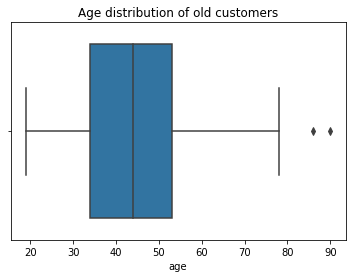

In [18]:
sns.boxplot(x='age', data = df_demo)
plt.title('Age distribution of old customers')

**Gender distribution amongst old and new customers

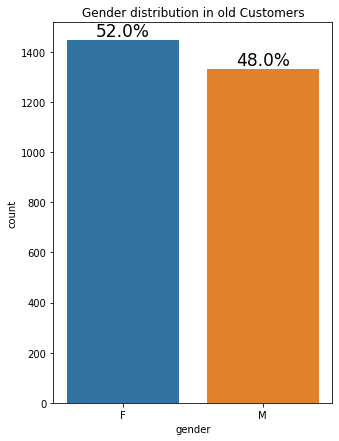

In [19]:
plt.figure(figsize=(5,7))
g = sns.countplot(df_demo['gender'])
plt.title('Gender distribution in old Customers')
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='17')

Bike purchased in past 3 years by old and new customer anlayzing by age a

Text(0.5, 1.0, 'Age-wise bike purchase in past 3 years by old customers')

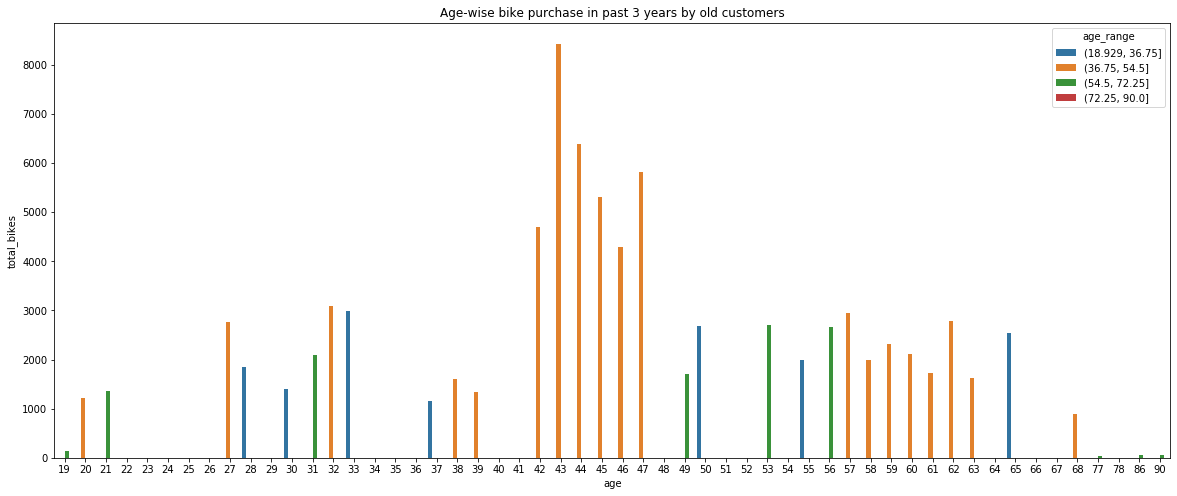

In [20]:
bike_df = df_demo.groupby('age')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(20,8))
ax = sns.barplot(x = bike_df['age'], y = bike_df['total_bikes'], hue= df_demo['age_range'], data = bike_df)
plt.title('Age-wise bike purchase in past 3 years by old customers')

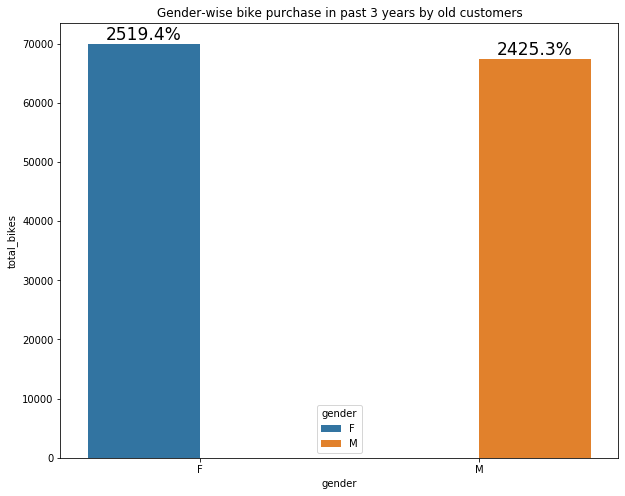

In [21]:
bike_df = df_demo.groupby('gender')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(10,8))
g = sns.barplot(x = bike_df['gender'], y = bike_df['total_bikes'], hue= df_demo['gender'], data = bike_df)
plt.title('Gender-wise bike purchase in past 3 years by old customers')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='17')

In [22]:
df_custadd.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [23]:
df_custadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [24]:
df_custadd['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Here we can see that the states name that is mentioned above has incosistency, so we'll clean that in one type of readable format so the analyzing these data become easy

In [25]:
df_custadd['state'].replace('New South Wales','NSW', inplace = True)
df_custadd['state'].replace('Victoria','VIC', inplace = True)

In [26]:
df_custadd['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [27]:
new_df = df_demo.merge(df_custadd, on = 'customer_id', how = 'inner')

In [28]:
new_df.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_range,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68,"(54.5, 72.25]",060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41,"(36.75, 54.5]",6 Meadow Vale Court,2153,NSW,Australia,10
2,9,Mala,Lind,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,48,"(36.75, 54.5]",97736 7th Trail,2023,NSW,Australia,12


Now after having age of each customer, we don't need DOB, so we'll drop that column from the table

In [29]:
new_df.drop(['DOB'], axis = 1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_range,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,68,"(54.5, 72.25]",060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,M,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,41,"(36.75, 54.5]",6 Meadow Vale Court,2153,NSW,Australia,10
2,9,Mala,Lind,F,97,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,48,"(36.75, 54.5]",97736 7th Trail,2023,NSW,Australia,12
3,12,Sawyere,Flattman,M,58,Nuclear Power Engineer,Manufacturing,Mass Customer,N,No,8.0,27,"(18.929, 36.75]",44339 Golden Leaf Alley,4557,QLD,Australia,4
4,13,Gabriele,Norcross,M,38,Developer I,Financial Services,High Net Worth,N,Yes,8.0,66,"(54.5, 72.25]",2 Sutherland Street,3799,VIC,Australia,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,3993,Andi,Dumelow,F,6,Librarian,Entertainment,Mass Customer,N,No,10.0,47,"(36.75, 54.5]",681 Elmside Place,3750,VIC,Australia,6
2773,3994,Stephie,Byars,F,5,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0,32,"(18.929, 36.75]",2918 Summer Ridge Hill,3030,VIC,Australia,2
2774,3995,Rusty,Iapico,M,93,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,46,"(36.75, 54.5]",613 Erie Lane,2088,NSW,Australia,12
2775,3996,Rosalia,Halgarth,F,8,VP Product Management,Health,Mass Customer,N,No,19.0,46,"(36.75, 54.5]",0 Transport Center,3977,VIC,Australia,6


In [30]:
new_df.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
age_range                              0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
dtype: int64

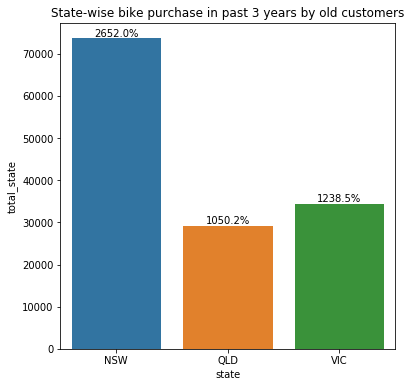

In [31]:
car_df = new_df.groupby('state')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_state')
plt.figure(figsize=(6,6))
g = sns.barplot(x = car_df['state'], y = car_df['total_state'], data = car_df)
plt.title('State-wise bike purchase in past 3 years by old customers')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='10')

In [33]:
df_transaction.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0


In [34]:
df_transaction = df_transaction.dropna()

In [35]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

We can see here the product first sold date is not in right readable format, so we will correct it

In [36]:
df_transaction['product_first_sold_date'] = pd.to_datetime(df_transaction['product_first_sold_date']).dt.date

In [37]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [38]:
df_transaction['Profit Margin'] = df_transaction['list_price'] - df_transaction['standard_cost']
df_transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit Margin
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,1055.82


In [39]:
duplicate_data = df_transaction.duplicated()
df_transaction[duplicate_data].sum()

transaction_id             0.0
product_id                 0.0
customer_id                0.0
transaction_date           0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
Profit Margin              0.0
dtype: float64

In [40]:
df_demoaddtrans = new_df.merge(df_transaction, on = 'customer_id', how = 'inner')

In [41]:
df_demoaddtrans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13628 entries, 0 to 13627
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13628 non-null  int64         
 1   first_name                           13628 non-null  object        
 2   last_name                            13628 non-null  object        
 3   gender                               13628 non-null  object        
 4   past_3_years_bike_related_purchases  13628 non-null  int64         
 5   DOB                                  13628 non-null  datetime64[ns]
 6   job_title                            13628 non-null  object        
 7   job_industry_category                13628 non-null  object        
 8   wealth_segment                       13628 non-null  object        
 9   deceased_indicator                   13628 non-null  object        
 10  owns_car  

Now we'll calculate number of transaction with the customers on the basis of car ownership

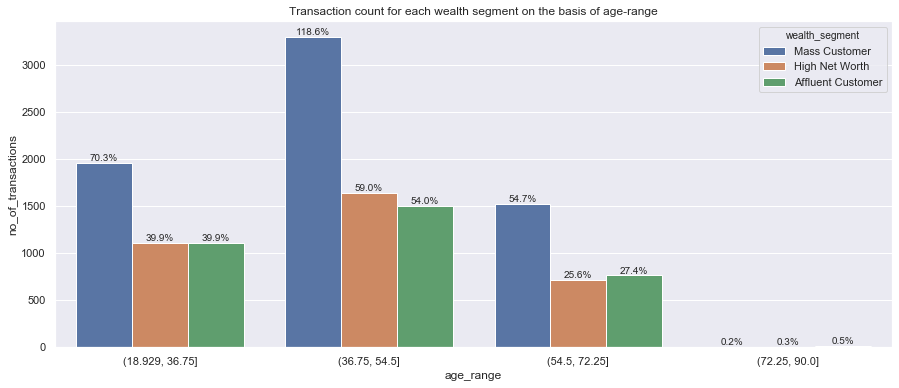

In [109]:
wealth_df = df_demoaddtrans.groupby(['age_range', 'wealth_segment'])['transaction_id'].count().reset_index(name='no_of_transactions').sort_values(by=['no_of_transactions'], ascending=False)

plt.figure(figsize=(15,6))
g = sns.barplot(x = wealth_df['age_range'], y = wealth_df['no_of_transactions'], hue = wealth_df['wealth_segment'])
plt.title('Transaction count for each wealth segment on the basis of age-range')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='10')

In [42]:
job = df_demoaddtrans.groupby('job_industry_category')['first_name'].count().reset_index(name='job_industry')
job.set_index('job_industry_category', inplace = True)
job

,job_industry
job_industry_category,
Argiculture,482
Entertainment,586
Financial Services,3228
Health,2653
IT,574
Manufacturing,3322
Property,1087
Retail,1411
Telecommunications,285


Text(0.5, 1.0, 'Old customers job industry distribution')

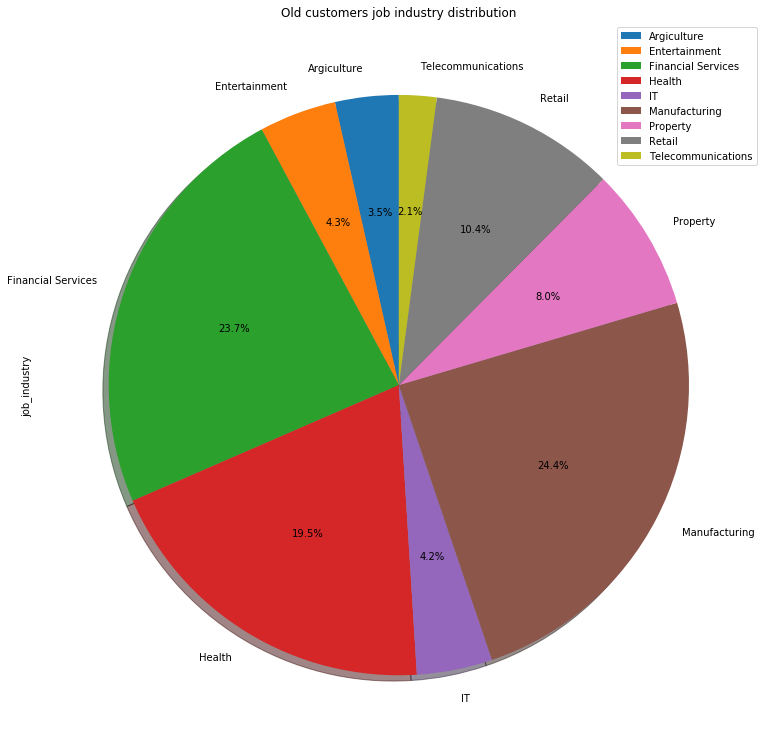

In [43]:
job.groupby(['job_industry_category']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(13,20), autopct='%1.1f%%')
plt.title('Old customers job industry distribution')

In [44]:
cars = df_demoaddtrans.groupby('state')['owns_car'].count().reset_index(name='count_owns_car')
cars

,state,count_owns_car
0,NSW,7211
1,QLD,3005
2,VIC,3412


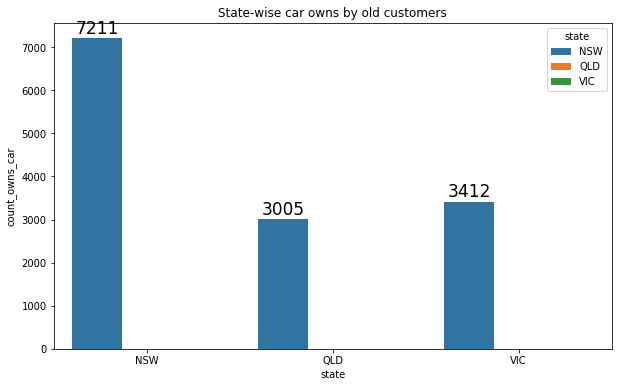

In [45]:
plt.figure(figsize=(10,6))

g = sns.barplot(x = cars['state'], y = cars['count_owns_car'], hue= df_demoaddtrans['state'], data = cars)
plt.title('State-wise car owns by old customers')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

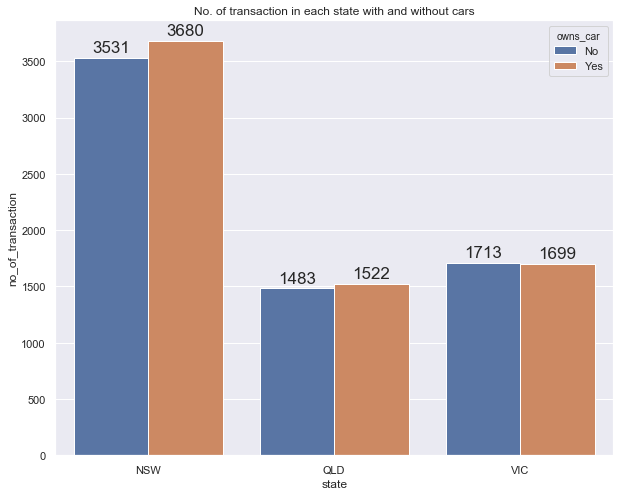

In [115]:
df_grouped = df_demoaddtrans.groupby(['state', 'owns_car'])['transaction_id'].count().reset_index(name='no_of_transaction')

plt.figure(figsize=(10,8))
g = sns.barplot(df_grouped['state'], df_grouped['no_of_transaction'], hue=df_grouped['owns_car'])
plt.title('No. of transaction in each state with and without cars')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

**customer_id :** Unique ID for each customer <br>
**transaction_id :** Unique ID for every time a consumer orders <br>
**product_id :** Unique ID for each product <br>
**transaction_date :** Date, when the transaction is made <br>
**list_price :** The price listed for each product for customers to buy <br>
**standard_cost :** The ground cost of the product, that costs to the seller <br>
**product_first_sold_date:** when the product is been ordered <br>
**Profit_Margin :** How much the company earn by selling the product <br>
**State:** Location, where the transaction happened

In [47]:
dff = df_demoaddtrans[['customer_id','age_range','transaction_id','transaction_date','product_id','list_price','standard_cost','product_first_sold_date','Profit Margin','state']]
dff

,customer_id,age_range,transaction_id,transaction_date,product_id,list_price,standard_cost,product_first_sold_date,Profit Margin,state
0,1,"(54.5, 72.25]",94,2017-12-23,86,235.63,125.07,1970-01-01,110.56,NSW
1,1,"(54.5, 72.25]",3765,2017-04-06,38,1577.53,826.51,1970-01-01,751.02,NSW
2,1,"(54.5, 72.25]",5157,2017-05-11,47,1720.70,1531.42,1970-01-01,189.28,NSW
3,1,"(54.5, 72.25]",9785,2017-01-05,72,360.40,270.30,1970-01-01,90.10,NSW
4,1,"(54.5, 72.25]",13424,2017-02-21,2,71.49,53.62,1970-01-01,17.87,NSW
...,...,...,...,...,...,...,...,...,...,...
13623,3496,"(18.929, 36.75]",9769,2017-03-07,5,574.64,459.71,1970-01-01,114.93,NSW
13624,3496,"(18.929, 36.75]",18797,2017-04-02,16,1661.92,1479.11,1970-01-01,182.81,NSW
13625,3497,"(18.929, 36.75]",6926,2017-11-08,1,1403.50,954.82,1970-01-01,448.68,VIC
13626,3497,"(18.929, 36.75]",8276,2017-09-01,18,575.27,431.45,1970-01-01,143.82,VIC


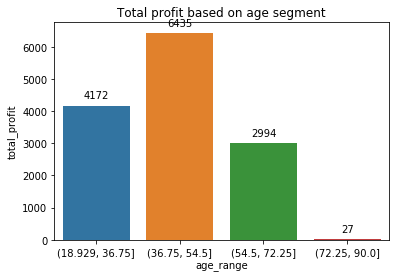

In [48]:
df_grouped = dff.groupby('age_range')['Profit Margin'].count().reset_index(name='total_profit')
plt.figure(figsize=(6,4))
g = sns.barplot(df_grouped['age_range'], df_grouped['total_profit'])
plt.title('Total profit based on age segment')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='10', textcoords = 'offset points')

In [49]:
df_grouped = dff.groupby(['age_range', 'product_id'])['Profit Margin'].sum().reset_index(name='total_profit')
df=df_grouped.sort_values(by = 'total_profit',ascending=False).head(5)
df

,age_range,product_id,total_profit
104,"(36.75, 54.5]",3,217926.40
3,"(18.929, 36.75]",3,124286.15
205,"(54.5, 72.25]",3,90235.15
139,"(36.75, 54.5]",38,89378.52
158,"(36.75, 54.5]",57,84773.00


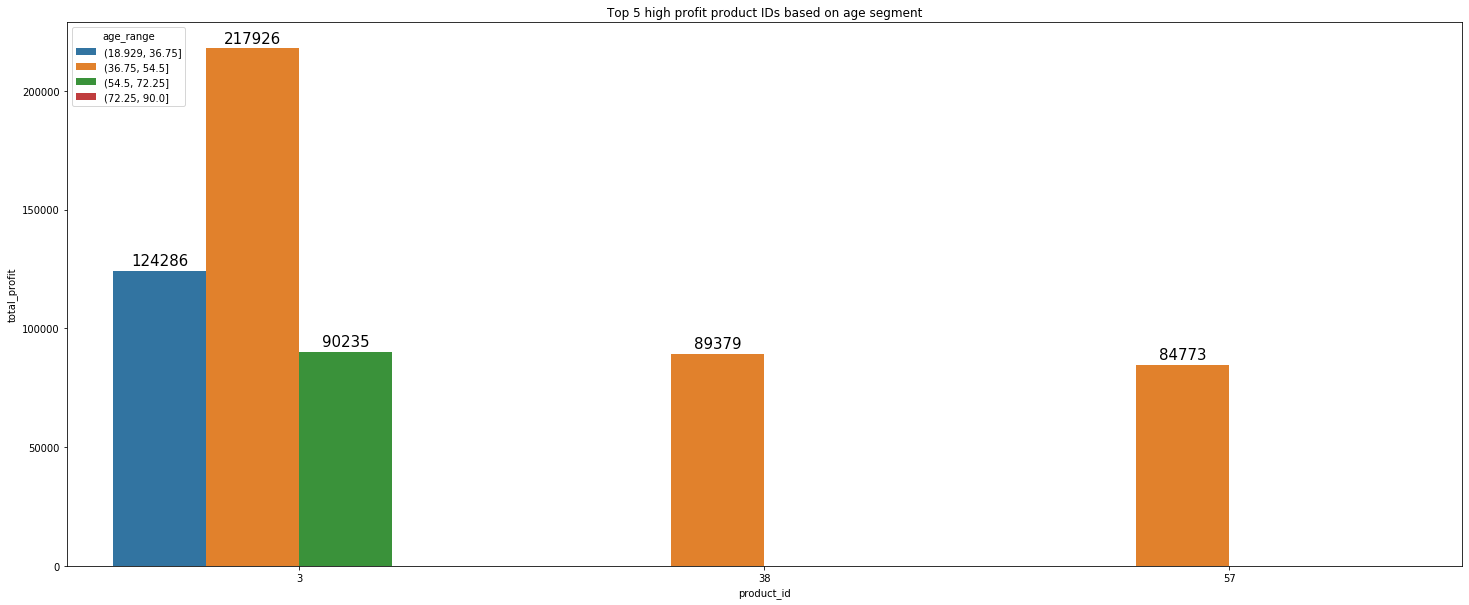

In [50]:
plt.figure(figsize=(25,10))
g = sns.barplot(df['product_id'], df_grouped['total_profit'], hue = df['age_range'])
plt.title('Top 5 high profit product IDs based on age segment')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='15', textcoords = 'offset points')

In [51]:
dff['month'] = dff['transaction_date'].dt.month
dff['month_range'] = pd.cut(dff['month'], bins=[1,2,3,4,5,6,7,8,9,10,11,12])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


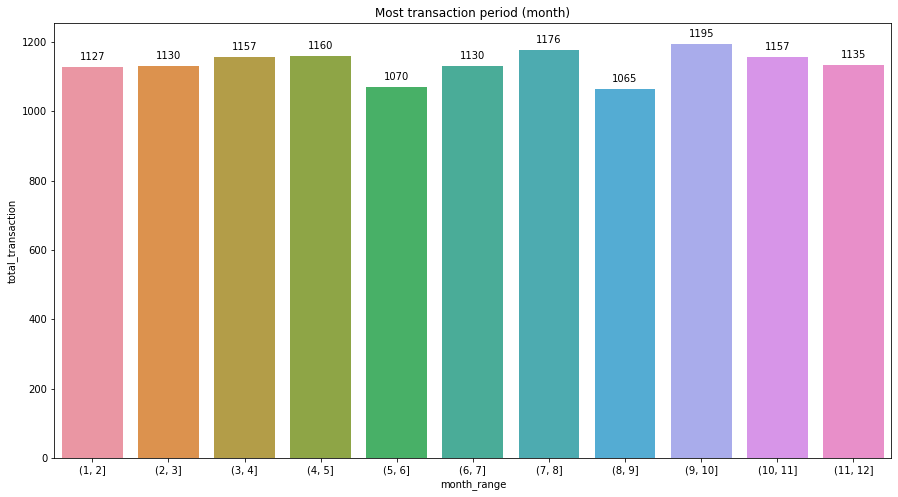

In [52]:
df_grouped = dff.groupby('month_range')['transaction_id'].count().reset_index(name='total_transaction')
plt.figure(figsize=(15,8))
g = sns.barplot(df_grouped['month_range'], df_grouped['total_transaction'])
plt.title('Most transaction period (month)')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='10', textcoords = 'offset points')

### We will analyse data based on RFM (menthod used for analyzing customer value)
**Recency:** when is the last time the user takes an action (e.g., login, place an order)?

**Frequency:** how many times does the user take this action?

**Monetary value:** what is the sum of monetary value from this user throughout his/her lifetime?

In [53]:
# to find recent transaction date
date = dff[['transaction_date']].max()

# to find the recency for transaction
dff['Recency'] = dff['transaction_date'].apply(lambda row:(date - row))

dff['Recency'] = dff['Recency'].dt.days
dff

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,customer_id,age_range,transaction_id,transaction_date,product_id,list_price,standard_cost,product_first_sold_date,Profit Margin,state,month,month_range,Recency
0,1,"(54.5, 72.25]",94,2017-12-23,86,235.63,125.07,1970-01-01,110.56,NSW,12,"(11.0, 12.0]",7
1,1,"(54.5, 72.25]",3765,2017-04-06,38,1577.53,826.51,1970-01-01,751.02,NSW,4,"(3.0, 4.0]",268
2,1,"(54.5, 72.25]",5157,2017-05-11,47,1720.70,1531.42,1970-01-01,189.28,NSW,5,"(4.0, 5.0]",233
3,1,"(54.5, 72.25]",9785,2017-01-05,72,360.40,270.30,1970-01-01,90.10,NSW,1,NaN,359
4,1,"(54.5, 72.25]",13424,2017-02-21,2,71.49,53.62,1970-01-01,17.87,NSW,2,"(1.0, 2.0]",312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13623,3496,"(18.929, 36.75]",9769,2017-03-07,5,574.64,459.71,1970-01-01,114.93,NSW,3,"(2.0, 3.0]",298
13624,3496,"(18.929, 36.75]",18797,2017-04-02,16,1661.92,1479.11,1970-01-01,182.81,NSW,4,"(3.0, 4.0]",272
13625,3497,"(18.929, 36.75]",6926,2017-11-08,1,1403.50,954.82,1970-01-01,448.68,VIC,11,"(10.0, 11.0]",52
13626,3497,"(18.929, 36.75]",8276,2017-09-01,18,575.27,431.45,1970-01-01,143.82,VIC,9,"(8.0, 9.0]",120


In [54]:
from pandas.core.reshape.concat import concat

df_grouped = dff.groupby('customer_id')['Recency'].min().reset_index(name='Recency')
df_grouped1 = dff.groupby('customer_id')['product_id'].count().reset_index(name='No_of_products')
df_grouped2 = dff.groupby('customer_id')['Profit Margin'].sum().reset_index(name='Total_profit')
merged_table = df_grouped.merge(df_grouped1, on = 'customer_id', how = 'inner').merge(df_grouped2, on = 'customer_id', how = 'inner')
merged_table.set_index('customer_id', inplace = True)
merged_table

,Recency,No_of_products,Total_profit
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38
...,...,...,...
3493,93,6,3728.88
3494,4,4,2755.11
3495,13,7,3847.65


Now we’re going to determine the r_quartile, f_quartile and m_quartile with RFM score at which customers buy the products.

In [55]:
# RFM_score : quartile values
quantiles = merged_table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 44.0, 0.75: 87.0},
 'No_of_products': {0.25: 4.0, 0.5: 5.0, 0.75: 7.0},
 'Total_profit': {0.25: 1796.0725,
  0.5: 2795.7800000000007,
  0.75: 4095.4175000000005}}

In [56]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [57]:
merged_table['r_quartile'] = merged_table['Recency'].apply(RScore, args=('Recency',quantiles,))
merged_table['f_quartile'] = merged_table['No_of_products'].apply(FMScore, args=('No_of_products',quantiles,))
merged_table['m_quartile'] = merged_table['Total_profit'].apply(FMScore, args=('Total_profit',quantiles,))
merged_table.head()

,Recency,No_of_products,Total_profit,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
1,7,11,3018.09,4,4,3
2,128,3,2226.26,1,1,2
9,78,6,2353.11,2,3,2
12,67,7,3540.03,2,3,3
13,27,7,4337.38,3,3,4


In [58]:
merged_table['RFM_Score'] = 100 * merged_table['r_quartile'] + 10 * merged_table['f_quartile'] + merged_table['m_quartile']
merged_table.head()

,Recency,No_of_products,Total_profit,r_quartile,f_quartile,m_quartile,RFM_Score
customer_id,,,,,,,
1,7,11,3018.09,4,4,3,443
2,128,3,2226.26,1,1,2,112
9,78,6,2353.11,2,3,2,232
12,67,7,3540.03,2,3,3,233
13,27,7,4337.38,3,3,4,334


Calculating here the most frequent buyers, who can be the potential buyer for future and more likely will respond on an offer<br>
**Diamond customer** Max - Most frequent buyer<br>
**Platinum customer** higher quartile - second most frequent buyers<br>
**Gold customer** Median - moderate buyers, who has chance to come back<br>
**Silver customer** Lower quartile - has rare chance to come back<br>
**Brownz customer** Minimum - the buyers who come once or twice and not likely to come back<br>

In [59]:
quantiles = merged_table.quantile(q=[0.0,0.25,0.5,0.75,1.00])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.0: 0.0, 0.25: 18.0, 0.5: 44.0, 0.75: 87.0, 1.0: 353.0},
 'No_of_products': {0.0: 1.0, 0.25: 4.0, 0.5: 5.0, 0.75: 7.0, 1.0: 14.0},
 'Total_profit': {0.0: 15.080000000000005,
  0.25: 1796.0725,
  0.5: 2795.7800000000007,
  0.75: 4095.4175000000005,
  1.0: 11668.949999999999},
 'r_quartile': {0.0: 1.0, 0.25: 2.0, 0.5: 3.0, 0.75: 4.0, 1.0: 4.0},
 'f_quartile': {0.0: 1.0, 0.25: 1.0, 0.5: 2.0, 0.75: 3.0, 1.0: 4.0},
 'm_quartile': {0.0: 1.0, 0.25: 1.25, 0.5: 2.5, 0.75: 3.75, 1.0: 4.0},
 'RFM_Score': {0.0: 111.0, 0.25: 211.0, 0.5: 311.0, 0.75: 411.0, 1.0: 444.0}}

In [60]:
def category_assignment(x,p,df):
    if x == df[p][0.00]:
        return "Brownz customer"
    elif (x >= df[p][0.00] and x < df[p][0.25]):
        return "Silver customer"
    elif (x >= df[p][0.25] and x < df[p][0.50]):
        return "Gold customer"
    elif (x >= df[p][0.50] and x < df[p][0.75]):
        return 'Platunum customer'  
    else:
        return 'Diamond Customer'

In [61]:
merged_table['customer_category'] = merged_table['RFM_Score'].apply(category_assignment, args=('RFM_Score', quantiles))
merged_table

,Recency,No_of_products,Total_profit,r_quartile,f_quartile,m_quartile,RFM_Score,customer_category
customer_id,,,,,,,,
1,7,11,3018.09,4,4,3,443,Diamond Customer
2,128,3,2226.26,1,1,2,112,Silver customer
9,78,6,2353.11,2,3,2,232,Gold customer
12,67,7,3540.03,2,3,3,233,Gold customer
13,27,7,4337.38,3,3,4,334,Platunum customer
...,...,...,...,...,...,...,...,...
3493,93,6,3728.88,1,3,3,133,Silver customer
3494,4,4,2755.11,4,1,2,412,Diamond Customer
3495,13,7,3847.65,4,3,3,433,Diamond Customer


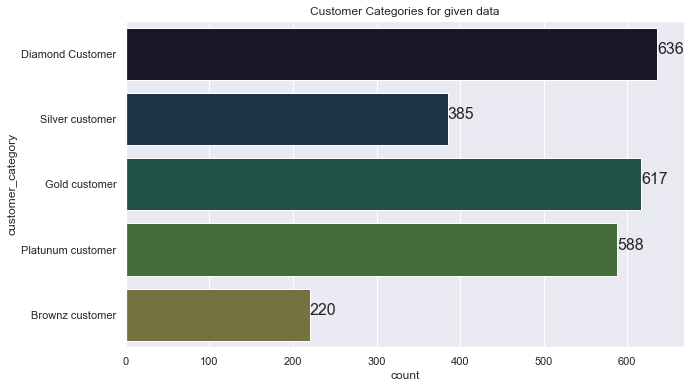

In [62]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1)

plt.title('Customer Categories for given data')

g = sns.countplot(y = merged_table['customer_category'], palette=sns.color_palette("cubehelix", 10))
for p in g.patches:
        value = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        g.annotate(value, (x, y), size=16)
plt.show()


Text(0, 0.5, 'Monetary Value')

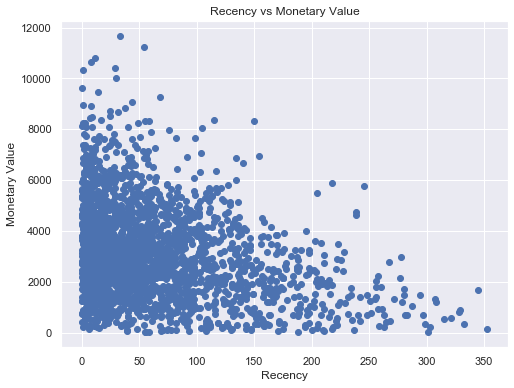

In [63]:
plt.figure(figsize=(8,6))
plt.title('Recency vs Monetary Value')

plt.scatter(merged_table['Recency'], merged_table['Total_profit'])
plt.xlabel('Recency')
plt.ylabel('Monetary Value')

Text(0, 0.5, 'Frequency')

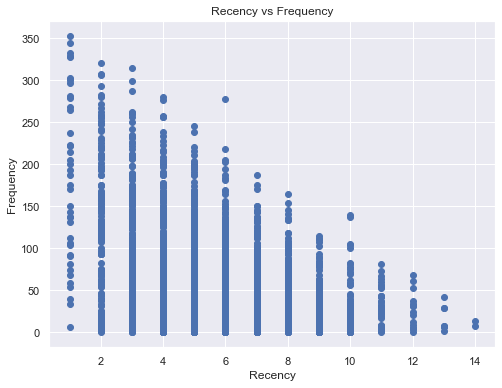

In [64]:
plt.figure(figsize=(8,6))
plt.title('Recency vs Frequency')

plt.scatter(merged_table['No_of_products'], merged_table['Recency'])
plt.xlabel('Recency')
plt.ylabel('Frequency')

Text(0, 0.5, 'Monetary Value')

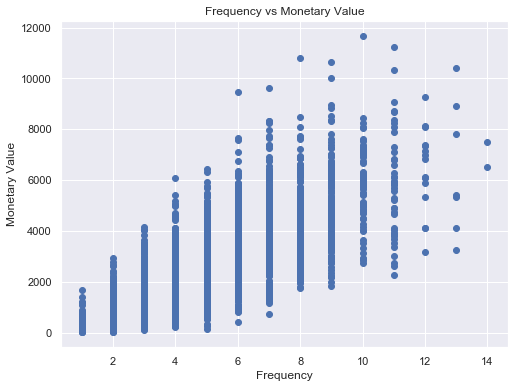

In [65]:
plt.figure(figsize=(8,6))
plt.title('Frequency vs Monetary Value')

plt.scatter(merged_table['No_of_products'], merged_table['Total_profit'])
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')

In [66]:
df_newcustomer.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.70,0.8750,0.743750,1,1,1.71875
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.89,1.1125,0.945625,1,1,1.71875
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.01,1.0100,1.010000,1,1,1.71875


In [67]:
df_newcustomer['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [68]:
df_newcustomer['state'].value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

In [69]:
df_newcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [81]:
columns = ['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20']
df_newcustomer.drop(columns, axis = 1, inplace = True)

In [82]:
df_newcustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [85]:
df_newcustomer = df_newcustomer.dropna()

In [86]:
df_newcustomer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           715 non-null    object        
 1   last_name                            715 non-null    object        
 2   gender                               715 non-null    object        
 3   past_3_years_bike_related_purchases  715 non-null    int64         
 4   DOB                                  715 non-null    datetime64[ns]
 5   job_title                            715 non-null    object        
 6   job_industry_category                715 non-null    object        
 7   wealth_segment                       715 non-null    object        
 8   deceased_indicator                   715 non-null    object        
 9   owns_car                             715 non-null    object        
 10  tenure        

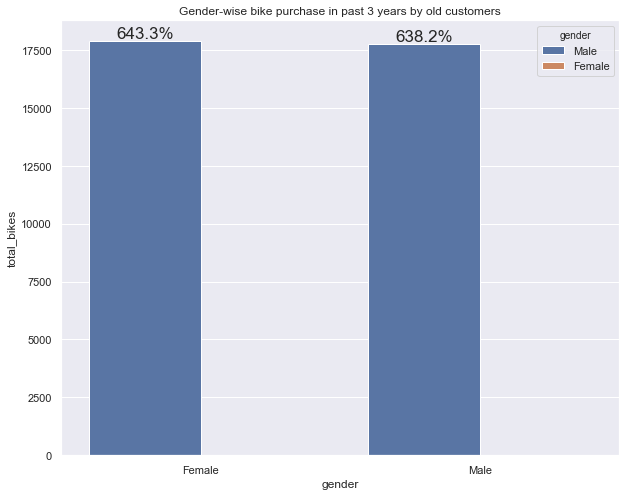

In [117]:
bike_df = df_newcustomer.groupby('gender')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(10,8))
g = sns.barplot(x = bike_df['gender'], y = bike_df['total_bikes'], hue= df_newcustomer['gender'], data = bike_df)
plt.title('Gender-wise bike purchase in past 3 years by old customers')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='17')

In [92]:
df_newcustomer["age"] = df_newcustomer["DOB"].apply(lambda x : (pd.datetime.now().year - x.year))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [95]:
age_index = df_newcustomer[df_newcustomer['age'] > 100 ].index
df_newcustomer.drop(age_index , inplace=True)

In [96]:
df_newcustomer['age_range'] = pd.cut(df_newcustomer['age'], bins=4)

Text(0.5, 1.0, 'Age-wise bike purchase in past 3 years by new customers')

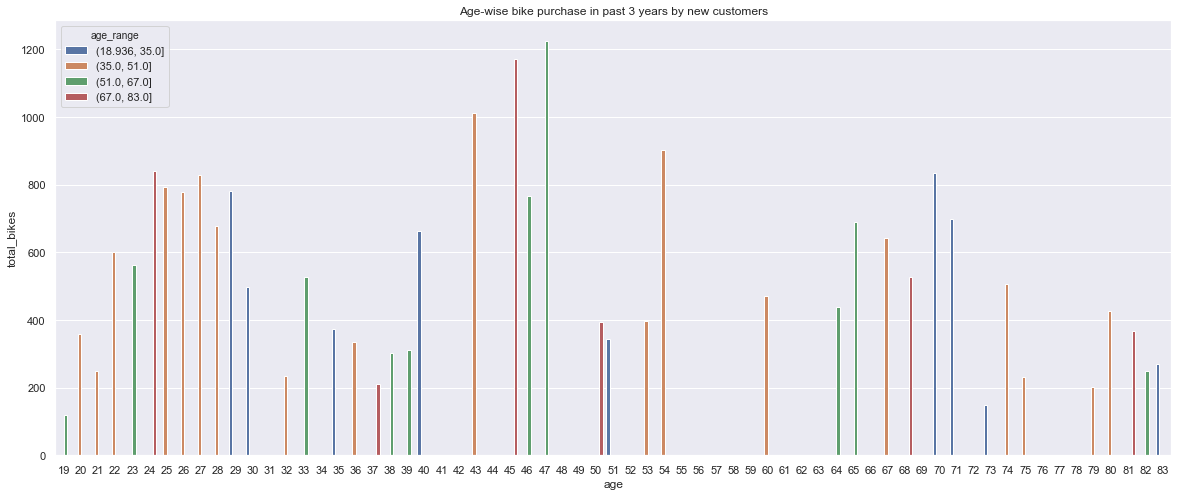

In [98]:
bike_df1 = df_newcustomer.groupby('age')['past_3_years_bike_related_purchases'].sum().reset_index(name='total_bikes')

plt.figure(figsize=(20,8))
ax = sns.barplot(x = bike_df1['age'], y = bike_df1['total_bikes'], hue= df_newcustomer['age_range'], data = bike_df1)
plt.title('Age-wise bike purchase in past 3 years by new customers')

In [99]:
job = df_newcustomer.groupby('job_industry_category')['first_name'].count().reset_index(name='job_industry')
job.set_index('job_industry_category', inplace = True)
job

,job_industry
job_industry_category,
Argiculture,23
Entertainment,32
Financial Services,182
Health,135
IT,29
Manufacturing,171
Property,49
Retail,73
Telecommunications,21


Text(0.5, 1.0, 'New customers job industry distribution')

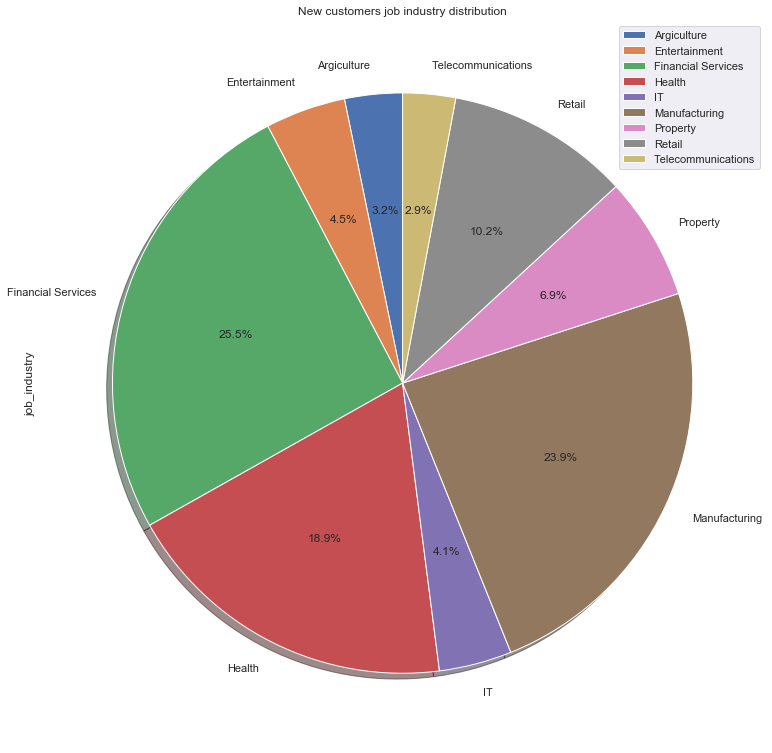

In [100]:
job.groupby(['job_industry_category']).sum().plot(kind='pie', subplots=True, shadow = True,startangle=90,
figsize=(13,20), autopct='%1.1f%%')
plt.title('New customers job industry distribution')

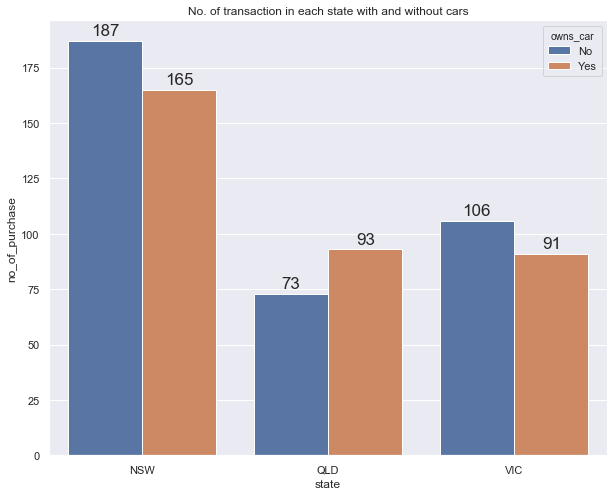

In [116]:
df_grouped = df_newcustomer.groupby(['state', 'owns_car'])['past_3_years_bike_related_purchases'].count().reset_index(name='no_of_purchase')

plt.figure(figsize=(10,8))
g = sns.barplot(df_grouped['state'], df_grouped['no_of_purchase'], hue=df_grouped['owns_car'])
plt.title('No. of transaction in each state with and without cars')
for p in g.patches:
    g.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), size='17', textcoords = 'offset points')

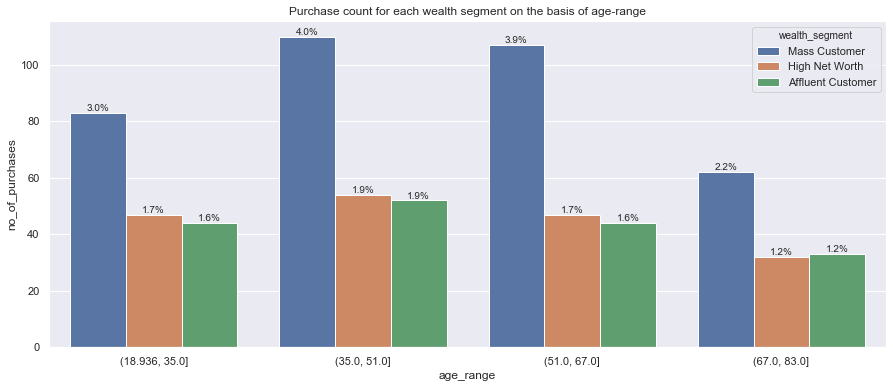

In [111]:
wealth_df = df_newcustomer.groupby(['age_range', 'wealth_segment'])['past_3_years_bike_related_purchases'].count().reset_index(name='no_of_purchases').sort_values(by=['no_of_purchases'], ascending=False)

plt.figure(figsize=(15,6))
g = sns.barplot(x = wealth_df['age_range'], y = wealth_df['no_of_purchases'], hue = wealth_df['wealth_segment'])
plt.title('Purchase count for each wealth segment on the basis of age-range')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.1f}%'.format(100*y/len(df_demo)), (x.mean(), y), ha='center', va='bottom', size='10')